In [82]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from colorama import Fore, Style 

data = pd.read_csv('test.csv')

# Check the balance of the dataset
data.columns = data.columns.str.strip()
print(data['loan_status'].value_counts())

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


<h3 style="color:yellow;"> data cleaning 

In [83]:
# checking null values
print(Fore.RED + Style.BRIGHT + "checking null values :- "); print(Style.RESET_ALL)
print(data.isnull().sum())

checking null values :- 

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [84]:
data.drop('loan_id', axis=1, inplace=True)

#@ Fill missing numerical values with mean
numerical_cols = data.select_dtypes(include=[np.number]).columns
data[numerical_cols] = data[numerical_cols].apply(lambda x: x.fillna(x.mean()))

#@ Fill missing categorical values with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# checking null values
print(data.isnull().sum())

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


<h3 style="color:yellow;">Changing strings to numbers</h3>

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# columns which have string values
categorical_cols = ['education', 'self_employed', 'loan_status']

# removing spaces from the columns
for col in data.columns:
    if data[col].dtype == 'object':  # If column is of object type (likely strings)
        data[col] = data[col].str.strip()

# Initialize the LabelEncoder
le = LabelEncoder()

# Splitting the data into test and train sets
x_train, x_test, y_train, y_test = train_test_split(data.drop('loan_status', axis=1), data['loan_status'], test_size=0.2, random_state=42)

label_encoders = {} # label_encoders change the string values to numerical values

# Encode the categorical columns
for col in categorical_cols:
    if col != 'loan_status':  # Exclude the target variable
        le = LabelEncoder()
        le.fit(data[col])  # Fit the LabelEncoder using the entire data
        x_train[col] = le.transform(x_train[col])
        x_test[col] = le.transform(x_test[col])
        label_encoders[col] = le

# Encode the target variable separately
le = LabelEncoder()
le.fit(data['loan_status'])  # Fit the LabelEncoder using the entire data
y_train = le.transform(y_train)
y_test = le.transform(y_test)
label_encoders['loan_status'] = le

# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
print("Encoding:", list(le.classes_))

# Print the unique values of y_train and y_test
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Encoding: ['Approved', 'Rejected']
Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


<h3 style="color:yellow;"> traning the  model

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 


logistic_model = LogisticRegression()
support_vector_model = SVC()
decision_tree_model = DecisionTreeClassifier()

#!training the models
logistic_model.fit(x_train, y_train)
support_vector_model.fit(x_train, y_train)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

<p style="color:pink;"> RoC curve </p>

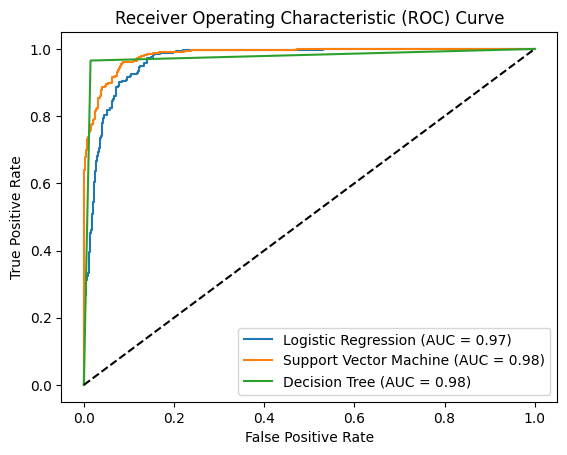

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the probabilities of the positive class
y_prob_logistic = logistic_model.predict_proba(x_test)[:, 1]
y_prob_svc = support_vector_model.decision_function(x_test)
y_prob_decision_tree = decision_tree_model.predict_proba(x_test)[:, 1]

# Calculate the AUC-ROC
auc_roc_logistic = roc_auc_score(y_test, y_prob_logistic)
auc_roc_svc = roc_auc_score(y_test, y_prob_svc)
auc_roc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)


# Calculate the ROC curve points
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc)
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, y_prob_decision_tree)

# Plot the ROC curve
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {auc_roc_logistic:.2f})')
plt.plot(fpr_svc, tpr_svc, label=f'Support Vector Machine (AUC = {auc_roc_svc:.2f})')
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f'Decision Tree (AUC = {auc_roc_decision_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # adding a diagonal line which tells if ROC curve is good or not

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

comparing the accuracy of the models

In [89]:
a = auc_roc_logistic; b = auc_roc_svc; c = auc_roc_decision_tree
if (a > b and a > c):
    print(Fore.GREEN + Style.BRIGHT + "Logistic Regression has the highest accuracy")
    best_model = logistic_model
elif (b > a and b > c):
    print(Fore.GREEN + Style.BRIGHT + "Support Vector Machine has the highest accuracy")
    best_model = support_vector_model
else:
    print(Fore.GREEN + Style.BRIGHT + "Decision Tree has the highest accuracy")
    best_model = decision_tree_model

Support Vector Machine has the highest accuracy


<h3 style="color:yellow;"> taking input from the user </h3>

In [90]:
# def predict_loan_status():
#     # Take user input
#     no_of_dependents = input("Enter number of dependents: ")
#     education = input("Enter education level (Graduate/Not Graduate): ")
#     self_employed = input("Enter self-employed status (Yes/No): ")
#     income_annum = input("Enter annual income: ")
#     loan_amount = input("Enter loan amount: ")
#     loan_term = input("Enter loan term (years): ")
#     cibil_score = input("Enter CIBIL score: ")
#     residential_assets_value = input("Enter residential assets value: ")
#     commercial_assets_value = input("Enter commercial assets value: ")
#     luxury_assets_value = input("Enter luxury assets value: ")
#     bank_asset_value = input("Enter bank asset value: ")

#     # Convert the input into a DataFrame
#     data = pd.DataFrame({
#         'no_of_dependents': [no_of_dependents], 
#         'education': [education], 
#         'self_employed': [self_employed],
#         'income_annum': [income_annum],
#         'loan_amount': [loan_amount],
#         'loan_term': [loan_term],
#         'cibil_score': [cibil_score],
#         'residential_assets_value': [residential_assets_value],
#         'commercial_assets_value': [commercial_assets_value],
#         'luxury_assets_value': [luxury_assets_value],
#         'bank_asset_value': [bank_asset_value]
#     })

#     # Apply Label Encoding
#     for col in categorical_cols:
#         if col != 'loan_status':  # Exclude the target variable
#             data[col] = label_encoders[col].transform(data[col])

#     # Apply Feature Scaling
#     data = scaler.transform(data)

#     # Make a prediction
#     prediction = best_model.predict(data)

#     # Convert the prediction back to its original form ('Approved' or 'Rejected')
#     prediction = label_encoders['loan_status'].inverse_transform(prediction)

#     return prediction[0]

# print("Loan status:", predict_loan_status())

In [91]:
def predict_loan_status():
    # Hardcoded values from the second row of your data
    no_of_dependents = '2'
    education = 'Graduate'
    self_employed = 'Yes'
    income_annum = '40000'
    loan_amount = '12200000'
    loan_term = '8'
    cibil_score = '417'
    residential_assets_value = '2700000'
    commercial_assets_value = '2200000'
    luxury_assets_value = '8800000'
    bank_asset_value = '3300000'

    # Convert the input into a DataFrame
    data = pd.DataFrame({
        'no_of_dependents': [no_of_dependents], 
        'education': [education], 
        'self_employed': [self_employed],
        'income_annum': [income_annum],
        'loan_amount': [loan_amount],
        'loan_term': [loan_term],
        'cibil_score': [cibil_score],
        'residential_assets_value': [residential_assets_value],
        'commercial_assets_value': [commercial_assets_value],
        'luxury_assets_value': [luxury_assets_value],
        'bank_asset_value': [bank_asset_value]
    })

    # Apply Label Encoding
    for col in categorical_cols:
        if col != 'loan_status':  # Exclude the target variable
            try:
                data[col] = label_encoders[col].transform(data[col])
            except ValueError:
                data[col] = label_encoders[col].transform(['Unknown'])

    # Apply Feature Scaling
    data = scaler.transform(data)

    # Make a prediction
    prediction = best_model.predict(data)

    # Convert the prediction back to its original form ('Approved' or 'Rejected')
    prediction = label_encoders['loan_status'].inverse_transform(prediction)

    return prediction[0]

print("Loan status:", predict_loan_status())

Loan status: Rejected
